In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Plot style
sns.set_theme(style="whitegrid", context="notebook")

In [22]:
file_path = "cleaned_top_jobs.csv"
df = pd.read_csv(file_path)

print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (197, 10)


,post,company,experience,level,year,month,day,salary_min,salary_max,salary_avg
0,Front Desk Officer,Autism Care Nepal Society,1.50,2,2026,1,1,NaN,NaN,NaN
1,Territory Sales Officer,Apollo Paints,1.50,2,2026,1,26,NaN,NaN,NaN
2,Project Officer,Sneha's Care,2.50,2,2026,1,10,NaN,NaN,NaN
3,School Teachers,Ace School,2.50,2,2026,1,10,NaN,NaN,NaN
4,Regional Sales Coordinator (Mobile Phone),ZTE Nepal,3.50,2,2026,1,10,NaN,NaN,NaN


In [23]:
# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   post        197 non-null    object 
 1   company     197 non-null    object 
 2   experience  197 non-null    float64
 3   level       197 non-null    int64  
 4   year        197 non-null    int64  
 5   month       197 non-null    int64  
 6   day         197 non-null    int64  
 7   salary_min  47 non-null     float64
 8   salary_max  47 non-null     float64
 9   salary_avg  47 non-null     float64
dtypes: float64(4), int64(4), object(2)
memory usage: 15.5+ KB


In [24]:
# Summary statistics (numerical)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
experience,197.00,2.52,2.20,0.00,1.50,2.50,3.50,15.50
level,197.00,2.01,0.60,1.00,2.00,2.00,2.00,4.00
year,197.00,2025.35,0.48,2025.00,2025.00,2025.00,2026.00,2026.00
month,197.00,8.15,5.25,1.00,1.00,12.00,12.00,12.00
day,197.00,17.47,9.65,1.00,8.00,19.00,25.00,31.00
salary_min,47.00,37408.16,18940.59,1100.00,25000.00,30000.00,47500.00,100000.00
salary_max,47.00,45991.49,24334.74,1100.00,30000.00,40000.00,50000.00,120000.00
salary_avg,47.00,41699.82,20990.87,1100.00,28750.00,37500.00,47500.00,110000.00


In [25]:
# Summary statistics (categorical)
df.describe(include="object").T

,count,unique,top,freq
post,197,158,Sales Executive,6
company,197,119,Liberty College,12


## Missing Value Analysis

In [26]:
missing_df = pd.DataFrame({
    "missing_count": df.isna().sum(),
    "missing_percent": (df.isna().sum() / len(df)) * 100
}).sort_values(by="missing_percent", ascending=False)

missing_df

,missing_count,missing_percent
salary_avg,150,76.14
salary_max,150,76.14
salary_min,150,76.14
post,0,0.00
company,0,0.00
experience,0,0.00
month,0,0.00
year,0,0.00
level,0,0.00
day,0,0.00


## Univariate Analysis

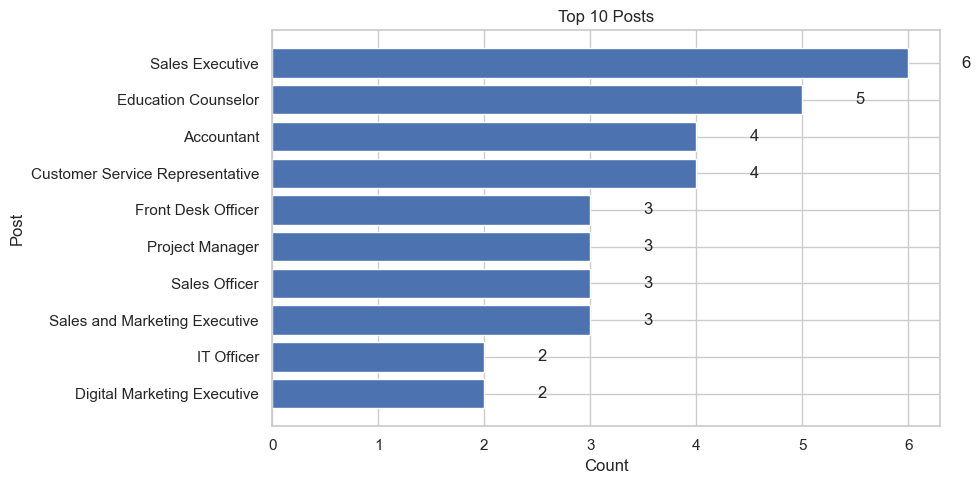

In [33]:
# Get top 10 posts in descending order
top_posts = df['post'].value_counts().head(10).sort_values(ascending=True)  # ascending=True for hbar (largest on top)

plt.figure(figsize=(10, 5))
bars = plt.barh(top_posts.index, top_posts.values) # color='skyblue'

# Add count labels on each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, int(width), va='center')

plt.title("Top 10 Posts")
plt.xlabel("Count")
plt.ylabel("Post")
plt.tight_layout()
plt.show()


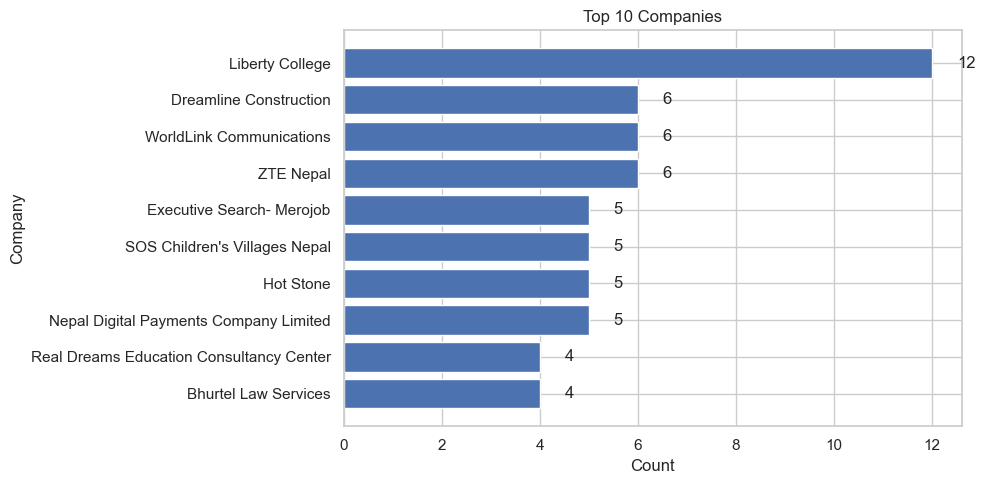

In [28]:
# Get top 10 posts in descending order
top_posts = df['company'].value_counts().head(10).sort_values(ascending=True)  # ascending=True for hbar (largest on top)

plt.figure(figsize=(10, 5))
bars = plt.barh(top_posts.index, top_posts.values) # color='skyblue'

# Add count labels on each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, int(width), va='center')

plt.title("Top 10 Companies")
plt.xlabel("Count")
plt.ylabel("Company")
plt.tight_layout()
plt.show()

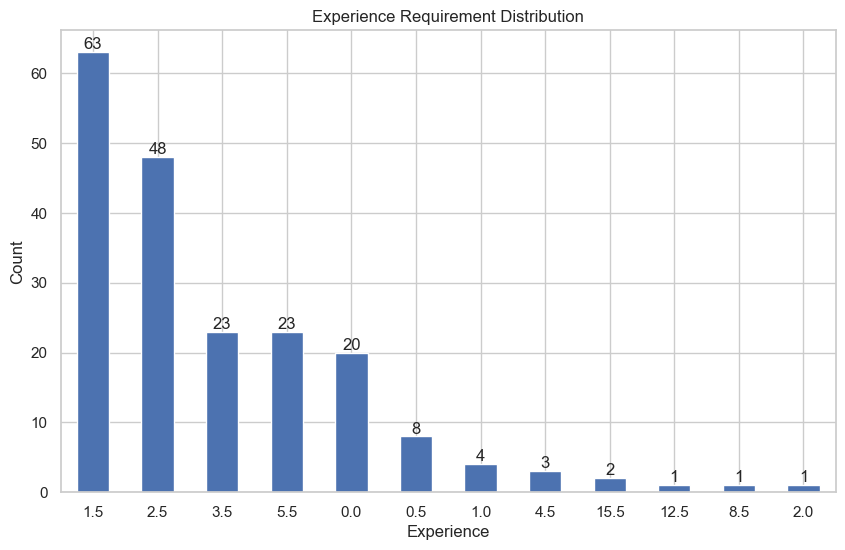

In [34]:
plt.figure(figsize=(10, 6))
bars = df['experience'].value_counts().plot(kind='bar', rot=0)

# Add number labels on top of each bar
for bar in bars.patches:  # 'patches' contains the rectangles (bars)
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x position at center of bar
        height,                             # y position on top of bar
        int(height),                         # label (count)
        ha='center', va='bottom'            # center horizontally, bottom vertically
    )

plt.title("Experience Requirement Distribution")
plt.xlabel("Experience")
plt.ylabel("Count")
plt.show()

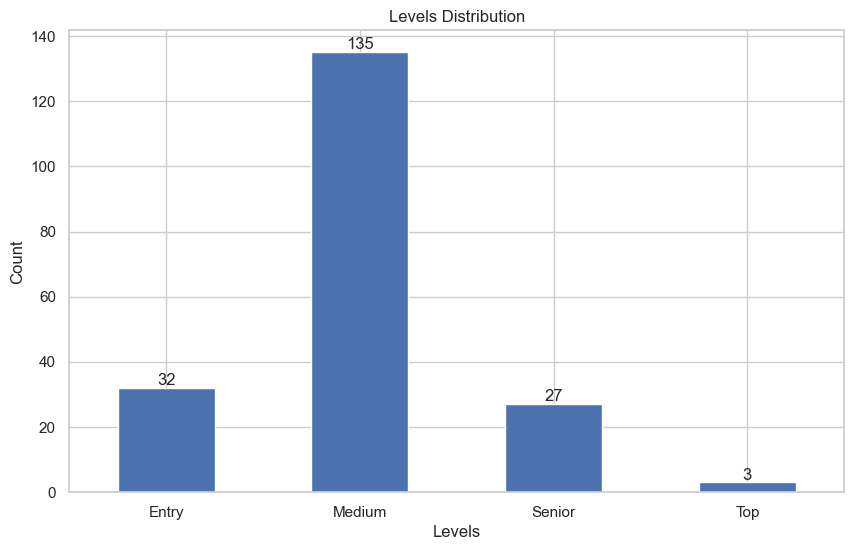

In [35]:
# Create a mapping dictionary
level_labels = {
    1: "Entry",
    2: "Medium",
    3: "Senior",
    4: "Top"
}

# Map the levels to labels
df['level_label'] = df['level'].map(level_labels)

# Plot using the new labels
plt.figure(figsize=(10, 6))
bars = df['level_label'].value_counts().sort_index().plot(kind='bar', rot=0)  # sort_index ensures proper order

# Add number labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        int(height),
        ha='center', va='bottom'
    )

plt.title("Levels Distribution")
plt.xlabel("Levels")
plt.ylabel("Count")
plt.show()

## Scatterplot

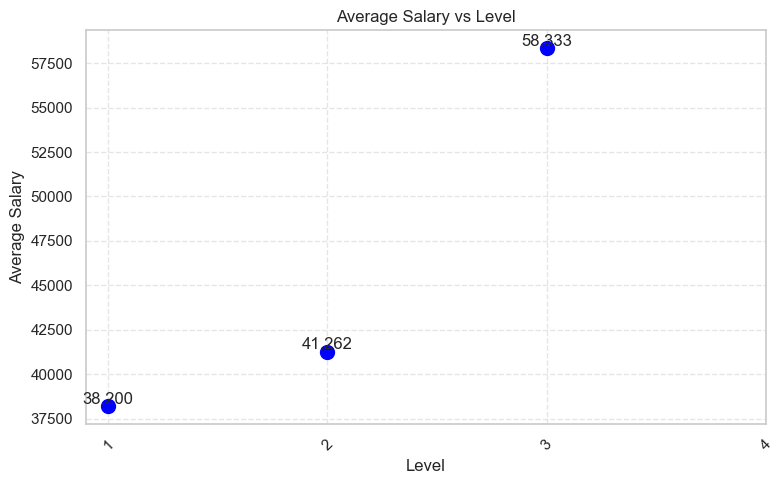

In [36]:
# Compute average salary per level
salary_avg = df.groupby('level')['salary_avg'].mean().sort_index()

salary_avg
plt.figure(figsize=(8, 5))
plt.scatter(salary_avg.index, salary_avg.values, color='blue', s=100)  # s= marker size

# Add labels on top of each point
for i, value in enumerate(salary_avg.values):
    plt.text(salary_avg.index[i], value, f"{value:,.0f}", ha='center', va='bottom')

plt.title("Average Salary vs Level")
plt.xlabel("Level")
plt.ylabel("Average Salary")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(range(1, int(salary_avg.index.max())+1))
plt.tight_layout()
plt.show()

### Correlation: Heatmap

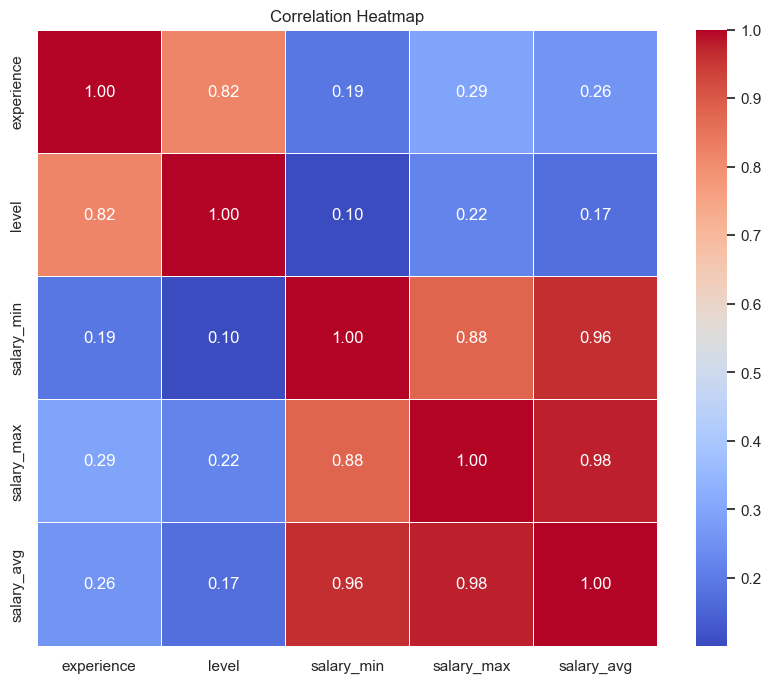

In [32]:
df_num = df.drop(columns=["year", "month", "day"], errors="ignore")

numerical_cols = df_num.select_dtypes(include=["int64", "float64"]).columns
corr_matrix = df_num[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Heatmap")
plt.show()
